### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임


In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
data = load_boston()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['PRICE']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X = df.drop('PRICE',axis=1)
y= df['PRICE']
rf =  RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_score = cross_val_score(rf,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_score)
print(f'5교차 검증의 개별 neg_mse_score:',np.round(neg_mse_score,2))
print(f'5교차 검증의 개별 rmse_score:',np.round(rmse_score,2))
print(f'5교차 검증의 개별 avg_rmsee:',np.round(avg_rmse,2))

5교차 검증의 개별 neg_mse_score: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 rmse_score: [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 개별 avg_rmsee: 4.42


In [10]:
def get_model_predict(model,X,y):
    neg_mse_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse = np.mean(rmse_score)
    print('###',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 rmse:{0:.3f}'.format(avg_rmse))

In [11]:
# Q, 교차검증 사용자 함수를 작성하여 XGBRegressor 클래스를 사용
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)
get_model_predict(xgb,X,y)

### XGBRegressor ####
5 교차 검증의 평균 rmse:4.251


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

dt =  DecisionTreeRegressor(random_state=0,max_depth=4)
gb= GradientBoostingRegressor(random_state=0,n_estimators =100)
lgb = LGBMRegressor(n_estimators=100)
models = [dt,gb,lgb]
for model in models:
    get_model_predict(model,X,y)

### DecisionTreeRegressor ####
5 교차 검증의 평균 rmse:5.978
### GradientBoostingRegressor ####
5 교차 검증의 평균 rmse:4.206
### LGBMRegressor ####
5 교차 검증의 평균 rmse:4.571


<AxesSubplot:>

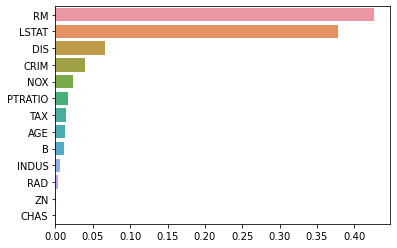

In [18]:
import seaborn as sns
rf = RandomForestRegressor(random_state=0,n_estimators=1000)
rf.fit(X,y)

feature_series = pd.Series(data = rf.feature_importances_,index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

(100, 2)


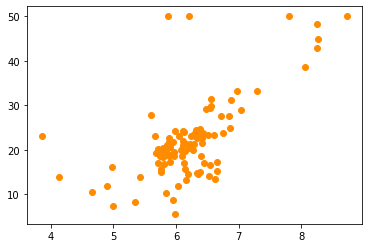

In [22]:
import matplotlib.pyplot as plt
boston_sample = df[['PRICE','RM']]
boston_sample = boston_sample.sample(n= 100,random_state=0)
print(boston_sample.shape)
plt.figure()
plt.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_reg2= DecisionTreeRegressor(max_depth=2)
lr_reg7= DecisionTreeRegressor(max_depth=7)
#테스트용 데이터 셋을 4.5~8.5까지 rm의 x축 보면 
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X =boston_sample['RM'].values.reshape(-1,1)
y =boston_sample['PRICE'].values.reshape(-1,1)
lr.fit(X,y)
lr_reg2.fit(X,y)
lr_reg7.fit(X,y)

pred_lr = lr.predict(X_test)
pred_lr2 = lr_reg2.predict(X_test)
pred_lr7 = lr_reg7.predict(X_test)

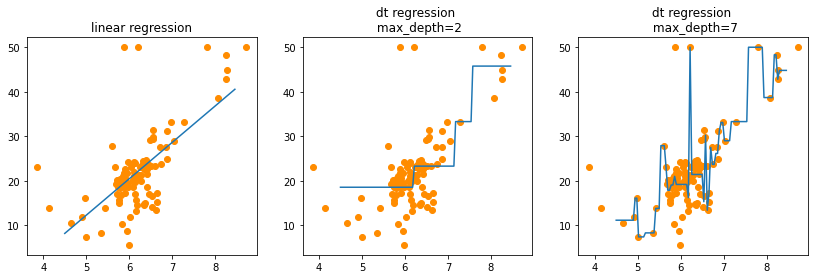

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)
ax1.set_title('linear regression')
ax1.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax1.plot(X_test,pred_lr,label='linear')

ax2.set_title('dt regression \n max_depth=2')
ax2.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax2.plot(X_test,pred_lr2,label='max_depth:3')

ax3.set_title('dt regression \n max_depth=7')
ax3.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax3.plot(X_test,pred_lr7,label='max_depth:7')
# max depth7 같은 경우 이상치까지 학습을 하며 과적합되기 쉬운 모델이 되었음을 알 수 있음